## 作業
在鐵達尼資料集中，   
可以用今天範例中提到的三種辨識異常值的方法，  
以 training data 為資料集。  
1.觀察票價是否有異常值的現象?  
2.你覺得找出的異常是真的異常? 你覺得需要做處理嗎?  
(試著講出自己的想法。)  


### 資料
鐵達尼號 train 資料集


In [48]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
import numpy as np
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [8]:
df_train = pd.read_csv("titanic/train.csv")
df_test = pd.read_csv("titanic/test.csv")


In [24]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 探索性分析:
*  觀察-是否有異常值  
我們來觀察一下 Fare 變數吧!!

## Q1:觀察票價是否有異常值的現象?

## 方法1
* 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。  



In [17]:
print(df_train['Fare'].mean()) #age平均
print(df_train['Fare'].std()) #age標準差

32.204207968574636
49.6934285971809


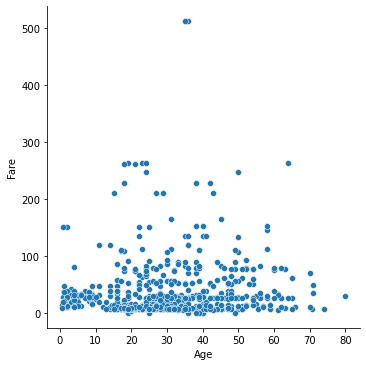

In [25]:
# 連續型用分布圖行來看
#g = sns.FacetGrid(df_train, col='Survived')
#g.map(sns.distplot, 'Age', kde=False)

sns.relplot(x="Age", y="Fare", data=df_train)

C:\Users\box62\.conda\envs\tf_base\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


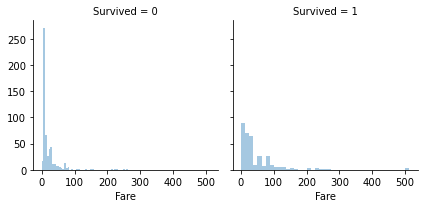

In [26]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

In [27]:
#先透過 計算統計值， 分別呈現數量，年齡平均，標準差，最大值和最小值。
print(df_train['Fare'].describe()) #age平均

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [47]:
#大於Fare最小大值
df_train.sort_values(by='Fare', ascending=True)['Fare'].tail(10)

299    247.5208
742    262.3750
311    262.3750
27     263.0000
88     263.0000
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: Fare, dtype: float64

In [ ]:


# 有  最後三個 


## 方法 2
* 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。  


In [49]:
# 創建一個函數，計算在這個資料中， ys:資料，times : 幾倍標準差，找出在這樣條件下的異常值。
def outliers_z_score(ys,times):
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > times)

In [50]:
out_index=outliers_z_score(df_train['Fare'],3)

In [54]:
print(out_index[0])


[ 27  88 118 258 299 311 341 377 380 438 527 557 679 689 700 716 730 737
 742 779]


In [55]:
print(df_train.loc[out_index[0],'Fare'])
#  所以用這個方法，找出的 outlier 就是少數族群，年齡較大的，一位是 80 和 74。

27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


## 方法3-盒鬚圖判別法(IQR method)

In [57]:
def outliers_iqr(ys,times):
    #注意 使用 np.percentile 要去除 nan 要不然計算出來會錯誤，所以我們採用下者的程式 np.nanpercentile
    #quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    quartile_1, quartile_3 = np.nanpercentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * times)
    upper_bound = quartile_3 + (iqr * times)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [58]:
out_index2=outliers_iqr(df_train['Fare'],1.5)

In [61]:
print(out_index2)
print("用第三種方法的找出的 outlier 有哪些?(1.5 倍IQR)")
print(df_train.loc[out_index2[0],'Fare'])

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
       139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
       258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
       311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
       375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
       496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
       585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
       689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
       779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
      dtype=int64),)
用第三種方法的找出的 outlier 有哪些?(1.5 倍IQR)
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64


In [63]:
out_index3=outliers_iqr(df_train['Fare'],2)
print(out_index3)
print("用第三種方法的找出的 outlier 有哪些?(2 倍IQR)")
print(df_train.loc[out_index3[0],'Fare'])

(array([ 27,  31,  34,  61,  62,  88, 102, 118, 124, 139, 195, 215, 224,
       230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299,
       305, 306, 307, 310, 311, 318, 319, 325, 332, 334, 337, 341, 373,
       375, 377, 380, 390, 393, 412, 435, 438, 445, 453, 484, 486, 496,
       498, 504, 505, 520, 527, 537, 544, 550, 557, 558, 581, 585, 587,
       591, 609, 627, 659, 660, 679, 689, 698, 700, 708, 716, 730, 737,
       741, 742, 759, 763, 765, 779, 789, 802, 820, 829, 835, 849, 856,
       879], dtype=int64),)
用第三種方法的找出的 outlier 有哪些?(2 倍IQR)
27     263.0000
31     146.5208
34      82.1708
61      80.0000
62      83.4750
         ...   
829     80.0000
835     83.1583
849     89.1042
856    164.8667
879     83.1583
Name: Fare, Length: 92, dtype: float64


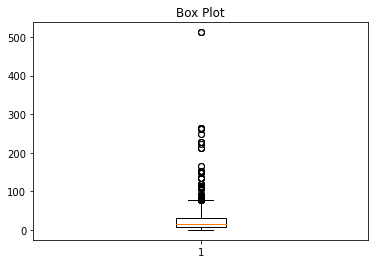

In [66]:
# 使用np.isnana(data)，找出在 age中的遺失值，然後逐位反轉，讓遺失值為 0,則可以透過索引的方式，濾掉遺失值。
plt.boxplot(df_train['Fare'][~np.isnan(df_train['Fare'])],whis=2)    #作圖
plt.title('Box Plot')
plt.show()

## Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?


# 不是 最小值與最大值差距太大 標準差過大

# 去除最大 最小值